In [1]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import re
from scipy.stats import pearsonr
from pathlib import Path

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet, cut_tree
from scipy.spatial.distance import pdist
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn import metrics
import sys
sys.setrecursionlimit(10000)
import os

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# final ivt vs native
CBF5GAL = "modification_calls/20190610_R941_CBF5GAL.csv"
CBF5GLU = "modification_calls/20190611_R941_CBF5GLU.csv"
NOP58GAL = "modification_calls/20190617_R941_NOP58GAL.csv"
NOP58GLU = "modification_calls/20190619_R941_NOP58GLU.csv"
IVT = "modification_calls/20191014_R941_IVT.csv"
mutant448 = "modification_calls/20210405_R941_mutant448.csv"
WT_YPD = "modification_calls/20210410_R941_WT_YPD.csv"
WT_KOAC = "modification_calls/20210412_R941_WT_KOAC.csv"
mutant452 = "modification_calls/20210413_R941_mutant452.csv"
WT_CY = "modification_calls/20210414_R941_WT_CY.csv"
mutant451 = "modification_calls/20210415_R941_mutant451.csv"
WT_PB = "modification_calls/20210520_R941_WT_PB.csv"
WT_stationary = "modification_calls/20210521_R941_WT_stationary.csv"
Dbp3d_YPD = "modification_calls/20210527_R941_Dbp3d_YPD.csv"
trl1d_YPD = "modification_calls/20210528_R941_trl1d_YPD.csv"
WT_rapa5 = "modification_calls/20210531_R941_WT_rapa5.csv"
Mix = "modification_calls/20210618_R941_Mix.csv"
prp43 = "modification_calls/20210619_R941_prp43.csv"
MIX_2 = "modification_calls/20210716_R941_MIX.csv"
YS603_18_YEPD = "modification_calls/20210717_R941_YS603_18_YEPD.csv"
prp16_18deg_YPD = "modification_calls/20210719_R941_prp16_18deg_YPD.csv"
spp382_YPD = "modification_calls/20210720_R941_spp382_YPD.csv"
R941_YS602_18_YPD = "modification_calls/20210722_R941_R941_YS602_18_YPD.csv"
dbr1d_YPD = "modification_calls/20210729_R941_dbr1d_YPD.csv"
sqs1d_YPD = "modification_calls/20210730_R941_sqs1d_YPD.csv"
snR4d_YPD = "modification_calls/20210823_R941_snR4d_YPD.csv"
snR45d_YPD = "modification_calls/20210824_R941_snR45d_YPD.csv"
mutant448_2 = "modification_calls/20210825_R941_mutant448.csv"
snR4d_alpha_YPD = "modification_calls/20210902_R941_snR4d_alpha_YPD.csv"

In [3]:
# Depletion plotting
all_file_paths = [CBF5GLU, NOP58GLU, IVT, WT_YPD] 
all_labels = ["CBF5GLU", "ANOP58GLU", "IVT", "1WT_YPD"] 
# color_map = "Set1"
# color_map = "colorblind"
color_map = ['#4477AA', '#EE6677', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']
# color_map = blue, red, yellow, cyan, purple, grey

color_map = ['#CCBB44','#4477AA', '#EE6677', '#66CCEE', '#AA3377', '#BBBBBB']
vc = VariantCalls(all_file_paths, all_labels, color_map=color_map)


In [4]:
# print(len(vc.get_X("RDN18-1", vc.get_contig_positions("RDN18-1"), label="CBF5GLU")))
# print(len(vc.get_X("RDN25-1", vc.get_contig_positions("RDN25-1"), label="CBF5GLU")))
# print(len(vc.get_X("RDN18-1", vc.get_contig_positions("RDN18-1"), label="NOP58GLU")))
# print(len(vc.get_X("RDN25-1", vc.get_contig_positions("RDN25-1"), label="NOP58GLU")))

In [5]:
n = 1000
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"
cmap = "YlOrBr"
cmap = "OrRd"


<IPython.core.display.Javascript object>


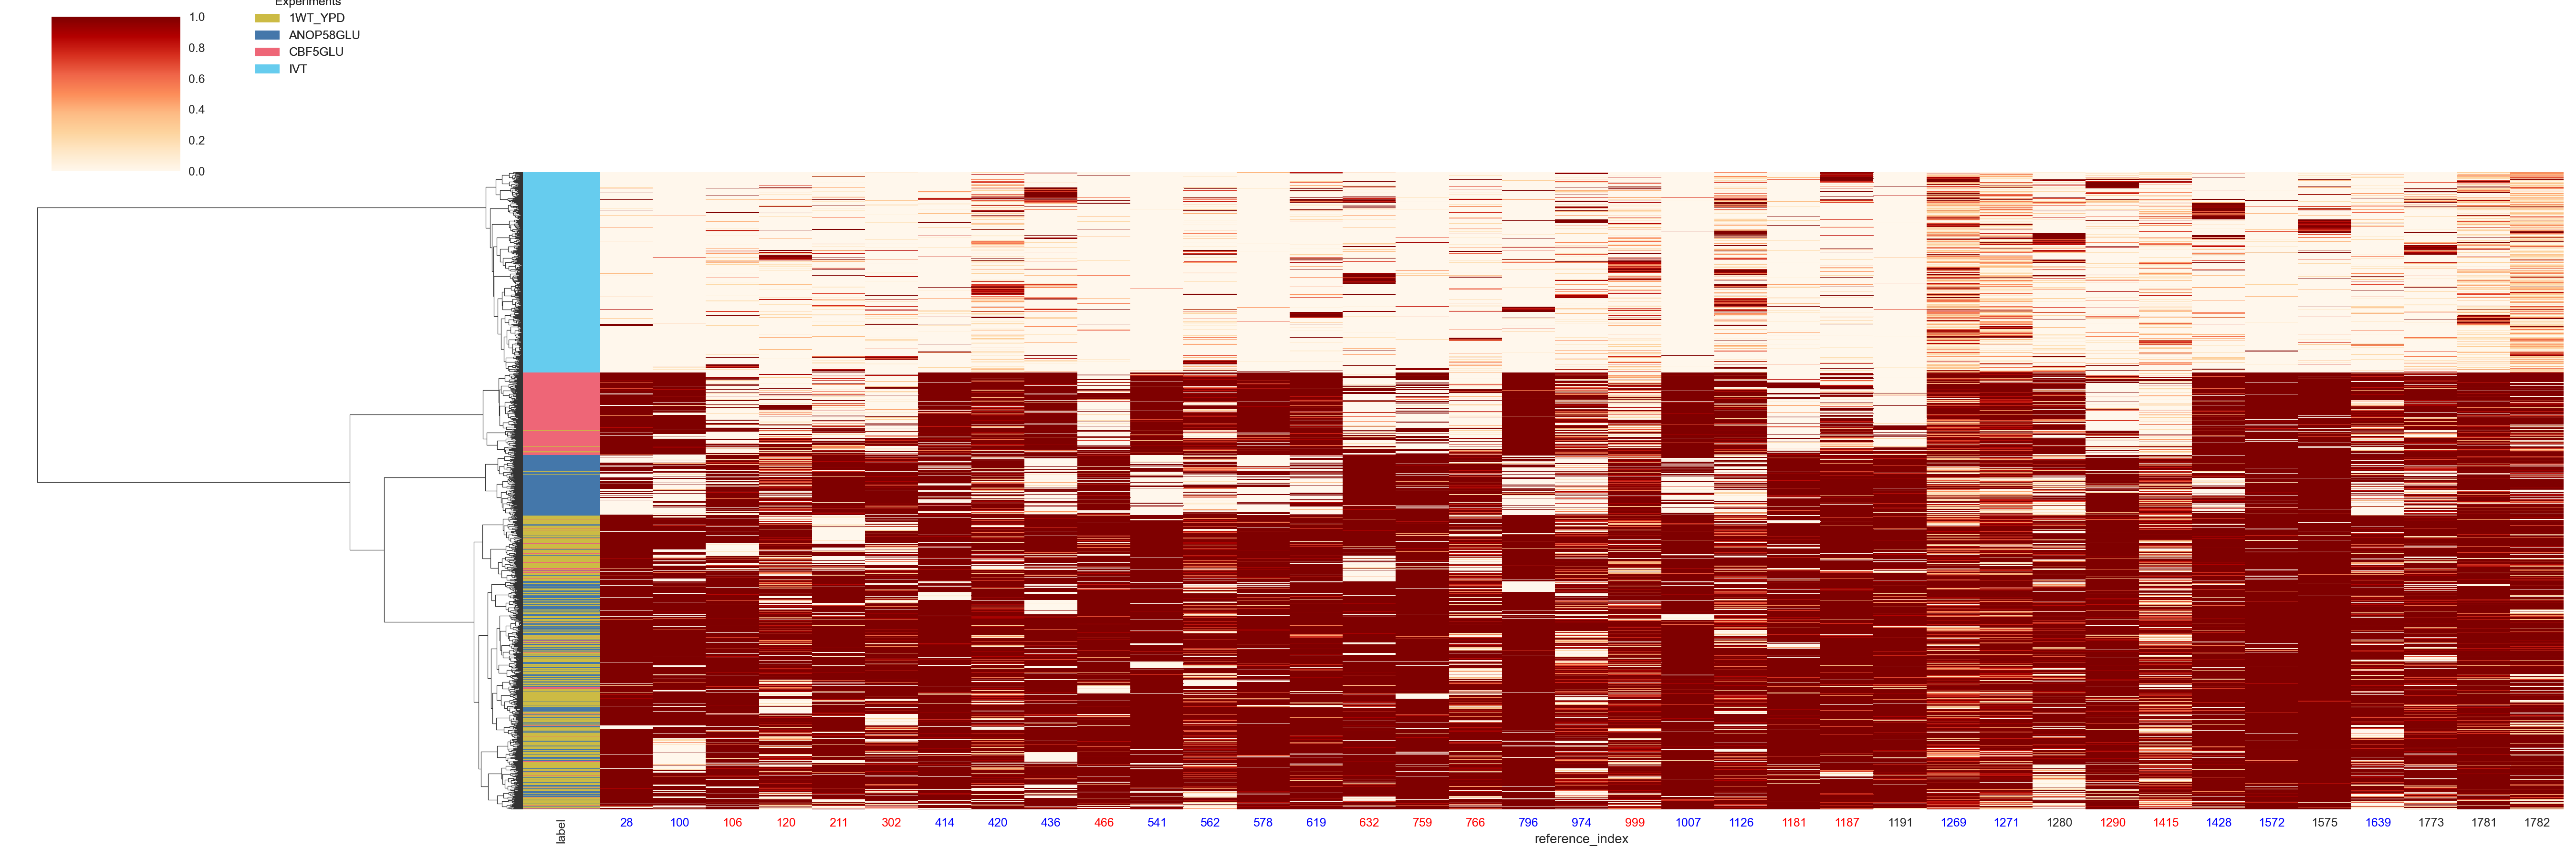

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


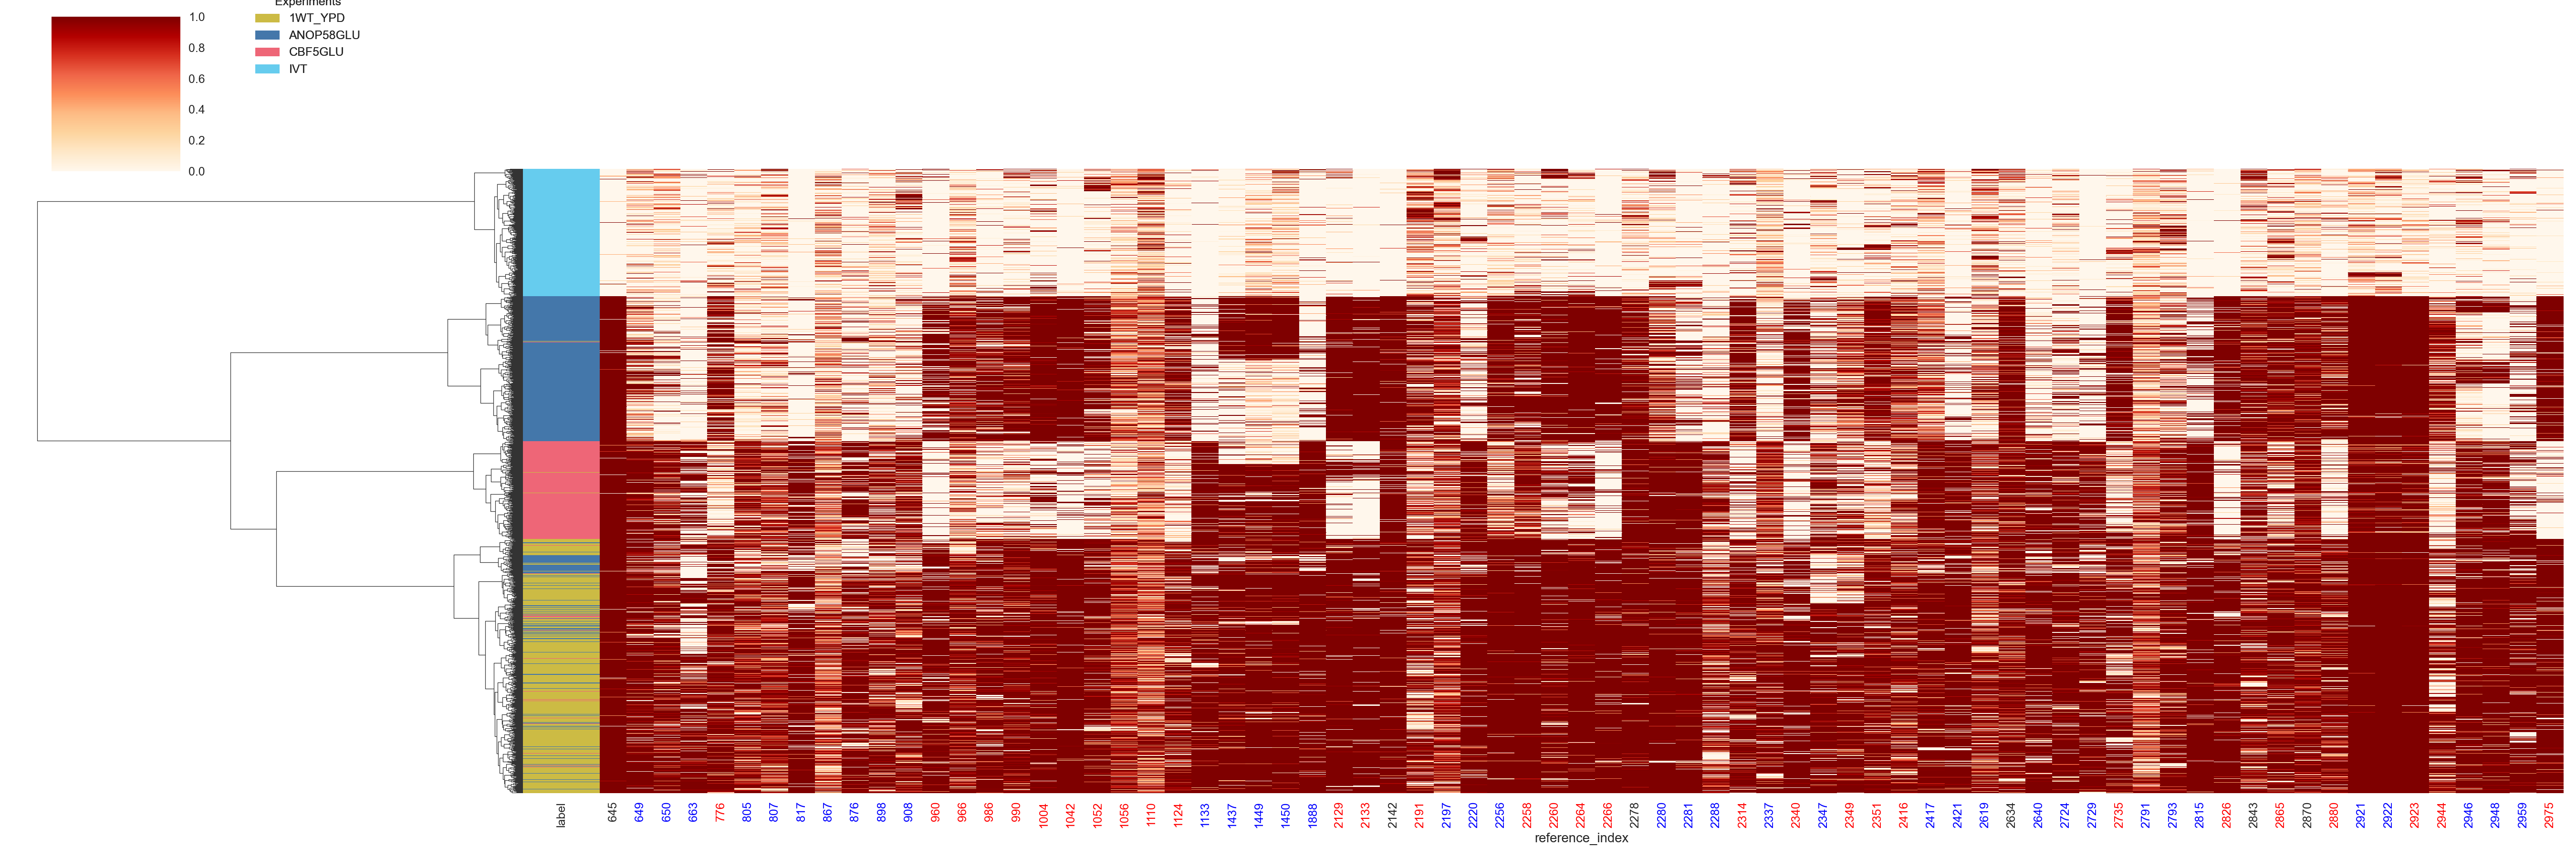

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [6]:
%matplotlib notebook


label = None
contig = 'RDN18-1'
contigs = ['RDN18-1', 'RDN25-1']
Path("figures/depletion_plots").mkdir(parents=True, exist_ok=True)

for contig in contigs:
    save_fig_path = f"figures/depletion_plots/{contig}_depletion_dendrogram.png"
    g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                   metric=metric,
                                   method=method, 
                                   label=label,
                                   col_cluster=False,
                                   row_cluster=True,
                                   twoprimeo_pos=None,
                                   pseduo_u_pos=None,
                                   legend=legend,
                                   figsize=figsize, 
                                   cmap=cmap)
    

<IPython.core.display.Javascript object>


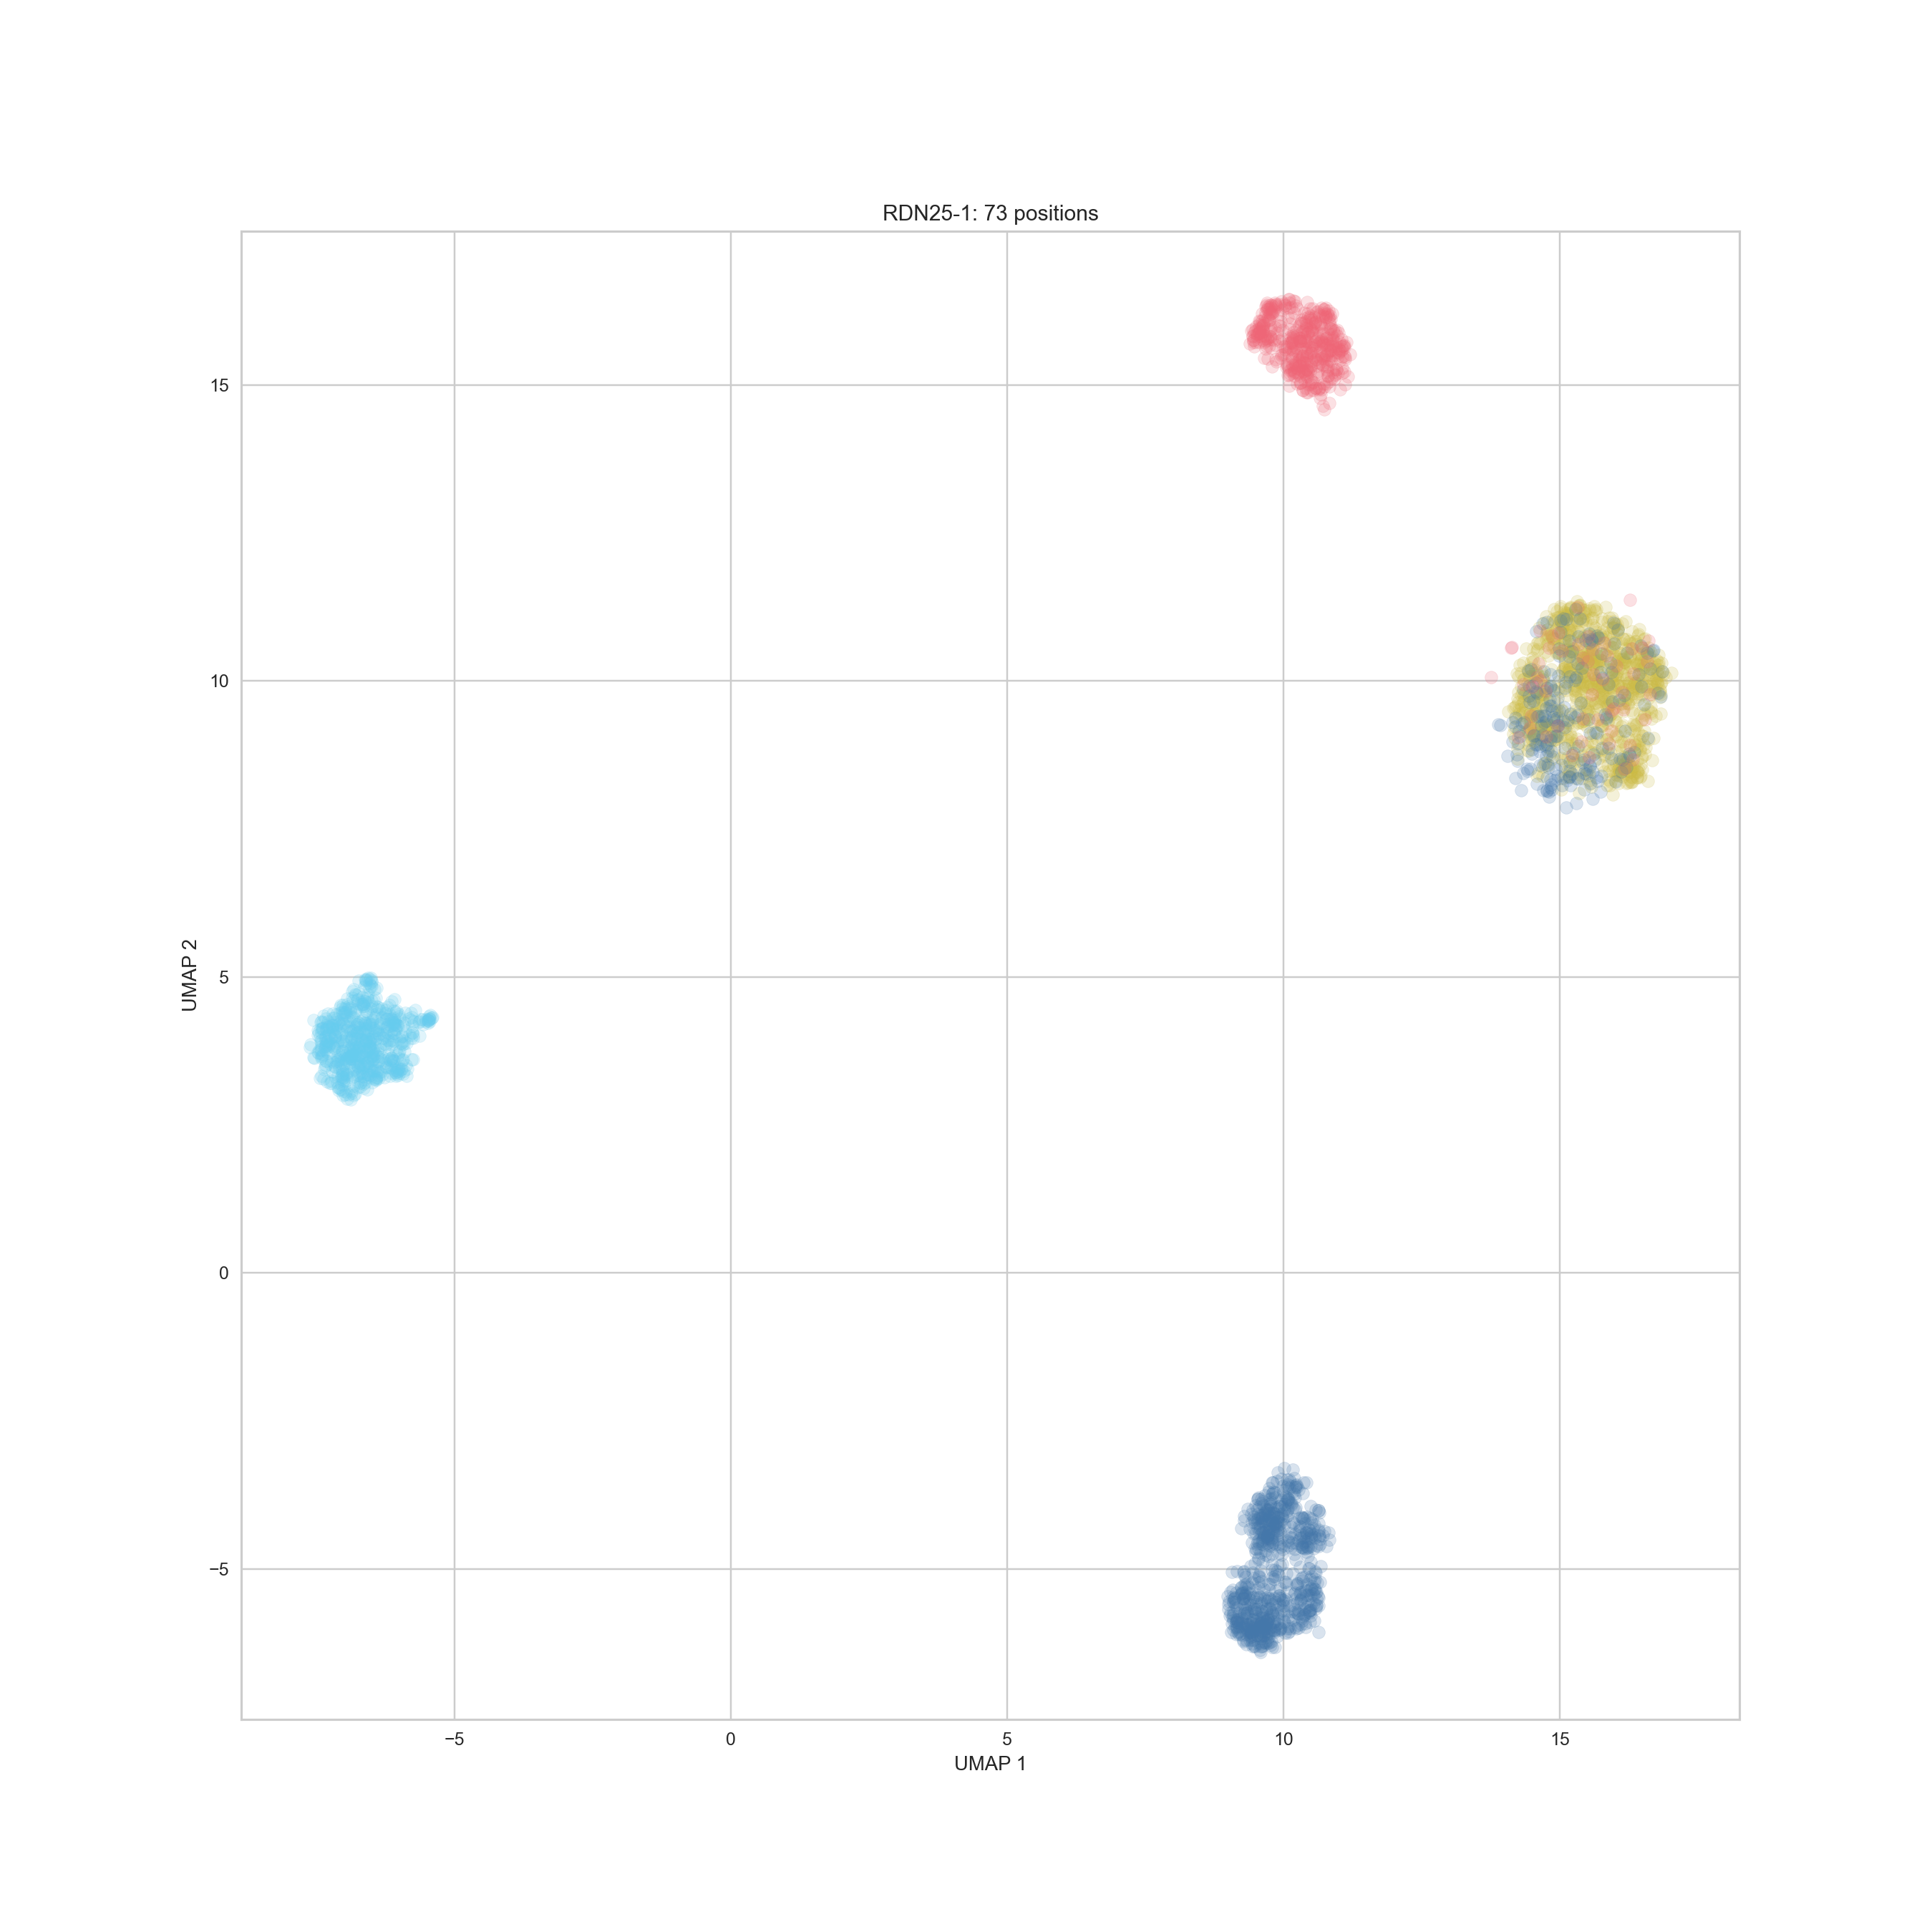

<IPython.core.display.Javascript object>


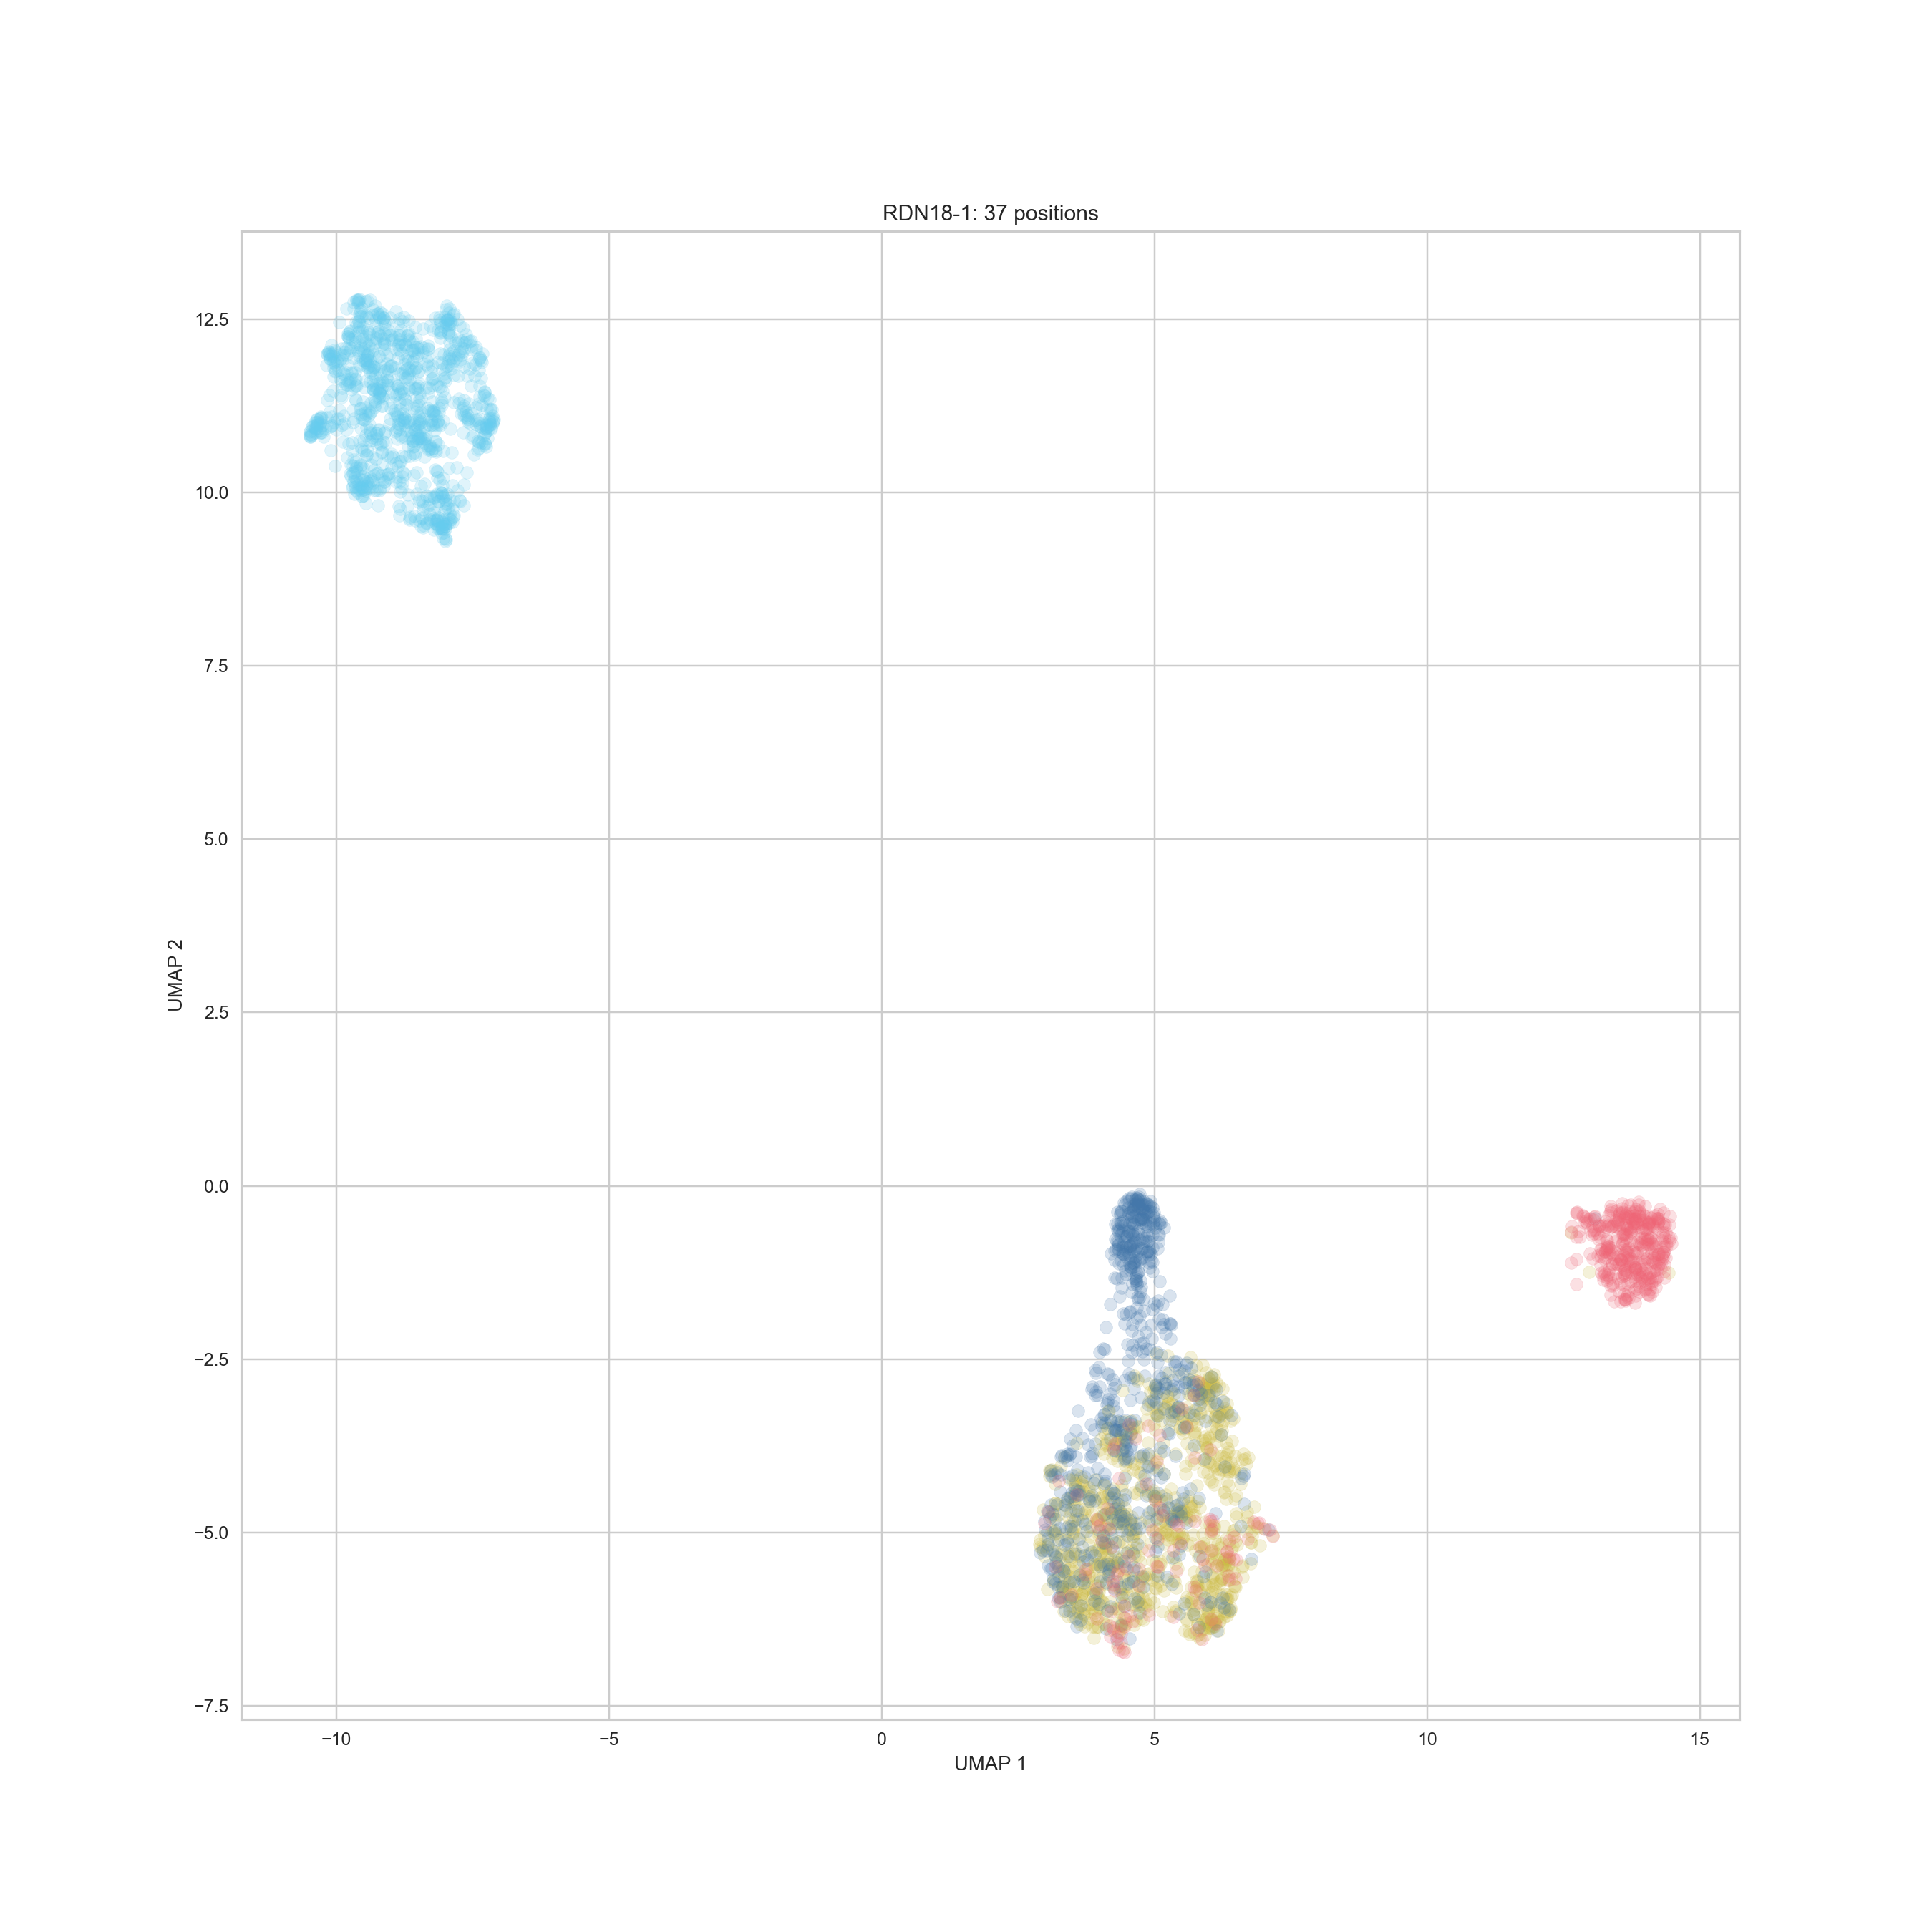

In [7]:
contigs = ["RDN25-1", "RDN18-1"]
for contig in contigs:
    n_components = 2
    n = 1000
    save_fig_path = None
    legend = False
    other_params = {"alpha": 0.2, "s": 50}
    save_fig_path = f"figures/depletion_plots/{contig}_depletion_umap.png"
    # save_fig_path = None
    vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, legend=legend, n=n, **other_params)       

Index(['1WT_YPD', '1WT_YPD', '1WT_YPD', '1WT_YPD', '1WT_YPD', '1WT_YPD',
       '1WT_YPD', '1WT_YPD', '1WT_YPD', '1WT_YPD',
       ...
       'CBF5GLU', 'CBF5GLU', 'CBF5GLU', 'CBF5GLU', 'CBF5GLU', 'CBF5GLU',
       'CBF5GLU', 'CBF5GLU', 'CBF5GLU', 'CBF5GLU'],
      dtype='object', name='label', length=1255)
Index(['1WT_YPD', '1WT_YPD', 'CBF5GLU', 'CBF5GLU', 'CBF5GLU', 'CBF5GLU',
       'CBF5GLU', 'CBF5GLU', 'CBF5GLU', 'CBF5GLU',
       ...
       'CBF5GLU', 'CBF5GLU', 'CBF5GLU', 'CBF5GLU', 'CBF5GLU', 'CBF5GLU',
       'CBF5GLU', 'CBF5GLU', 'CBF5GLU', 'CBF5GLU'],
      dtype='object', name='label', length=484)
Index(['1WT_YPD', '1WT_YPD', 'ANOP58GLU', 'ANOP58GLU', 'ANOP58GLU',
       'ANOP58GLU', 'ANOP58GLU', 'ANOP58GLU', 'ANOP58GLU', 'ANOP58GLU',
       ...
       'ANOP58GLU', 'ANOP58GLU', 'ANOP58GLU', 'ANOP58GLU', 'ANOP58GLU',
       'ANOP58GLU', 'ANOP58GLU', 'ANOP58GLU', 'ANOP58GLU', 'CBF5GLU'],
      dtype='object', name='label', length=715)
Index(['IVT', 'IVT', 'IVT', 'IVT', 'IVT',

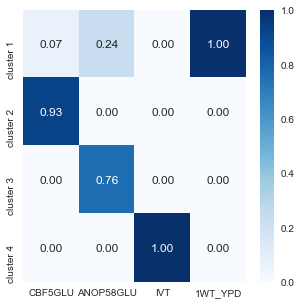

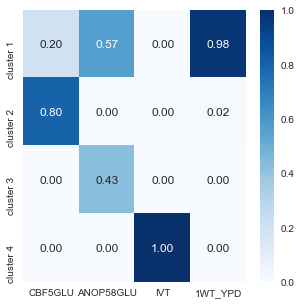

In [6]:
def get_count(count, label):
    if hasattr(count, label):
        return getattr(count, label)
    else:
        return 0

n=1000
n_clusters = 4
contigs = ["RDN25-1", "RDN18-1"]
for contig in contigs:
    X = vc.get_X(contig, vc.get_contig_positions(contig), n=n)
    Z = linkage(X, method=method, metric=metric)
    cut = cut_tree(Z, n_clusters=n_clusters)
    clusters = np.array([x[0]+1 for x in cut])
    plot_me = []
    for i in range(1, 5):
        cluster_counts = []
        counts = X[clusters == i].index.get_level_values(1).value_counts()
        print(X[clusters == i].index.get_level_values(1))
        for label in all_labels:
            cluster_counts.append(get_count(counts, label))
        plot_me.append(cluster_counts)
    data = pd.DataFrame(plot_me, columns=all_labels, index=[f"cluster {i}" for i in range(1, 5)])
    # plot
    f, ax = plt.subplots(figsize=(5, 5))
    figure_path = None
#     figure_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/percent_depletion/{contig}_depletion_fraction.svg"
    figure_path = f"figures/depletion_plots/{contig}_depletion_fraction.svg"

    percents = (data / data.sum())
    ax = sns.heatmap(percents, cmap="Blues", annot=True, fmt=".2f", vmin=0, vmax=1)

    if figure_path is not None:
#         assert not os.path.exists(figure_path), "Save fig path does exist: {}".format(figure_path)
        plt.savefig(figure_path, dpi=1000)
    else:
        plt.show()

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


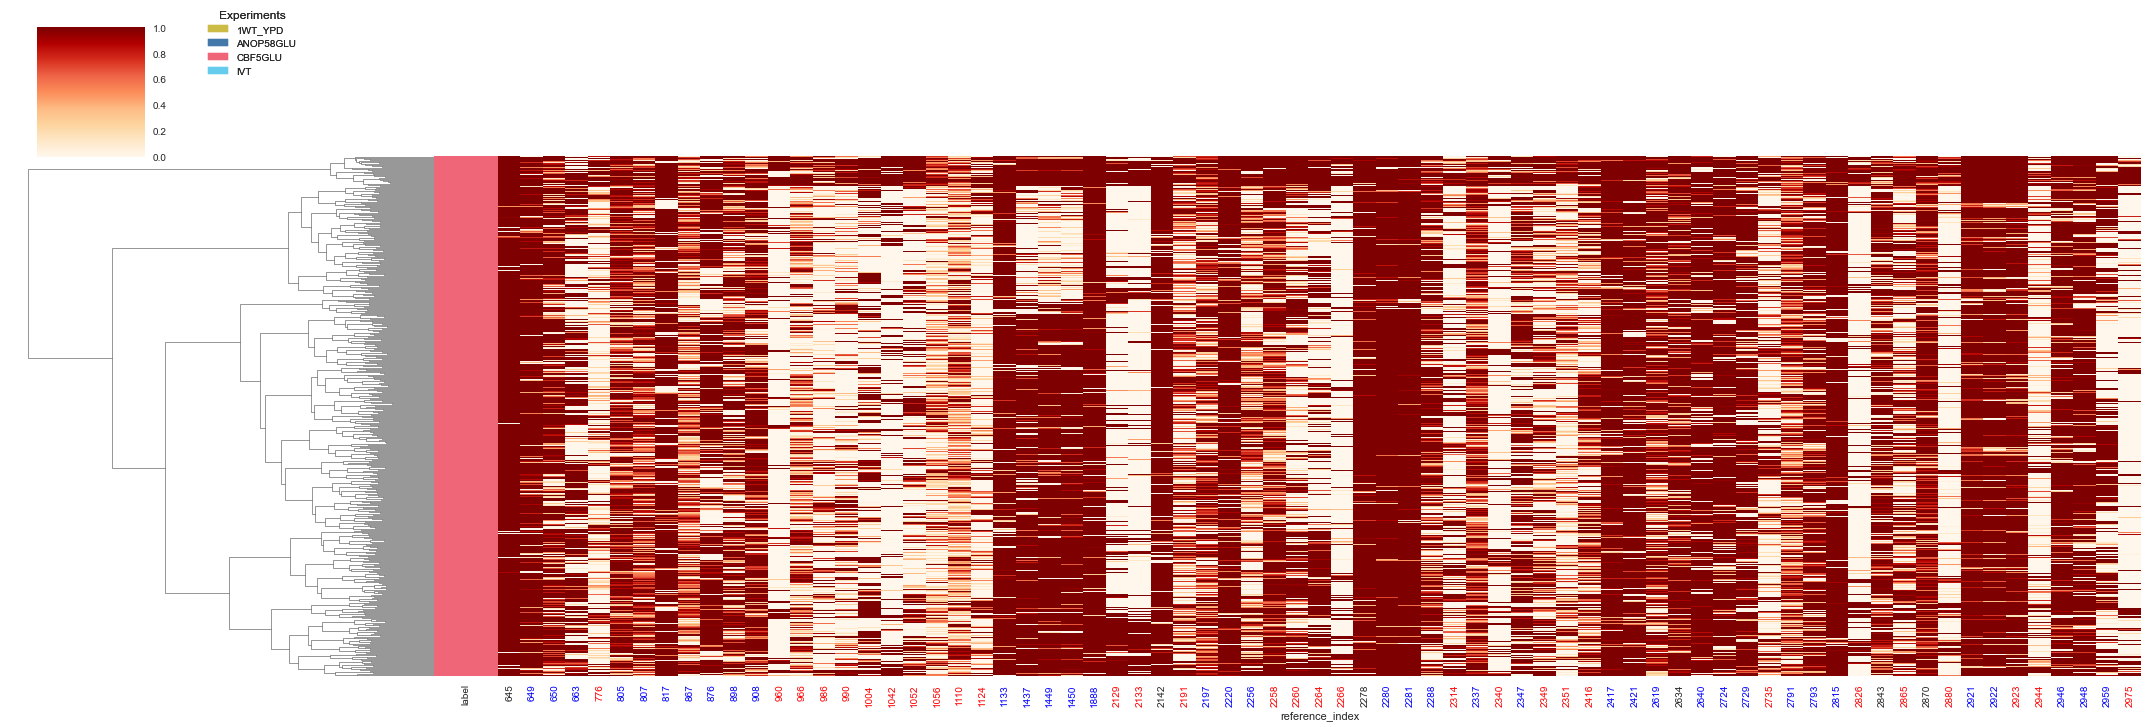

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


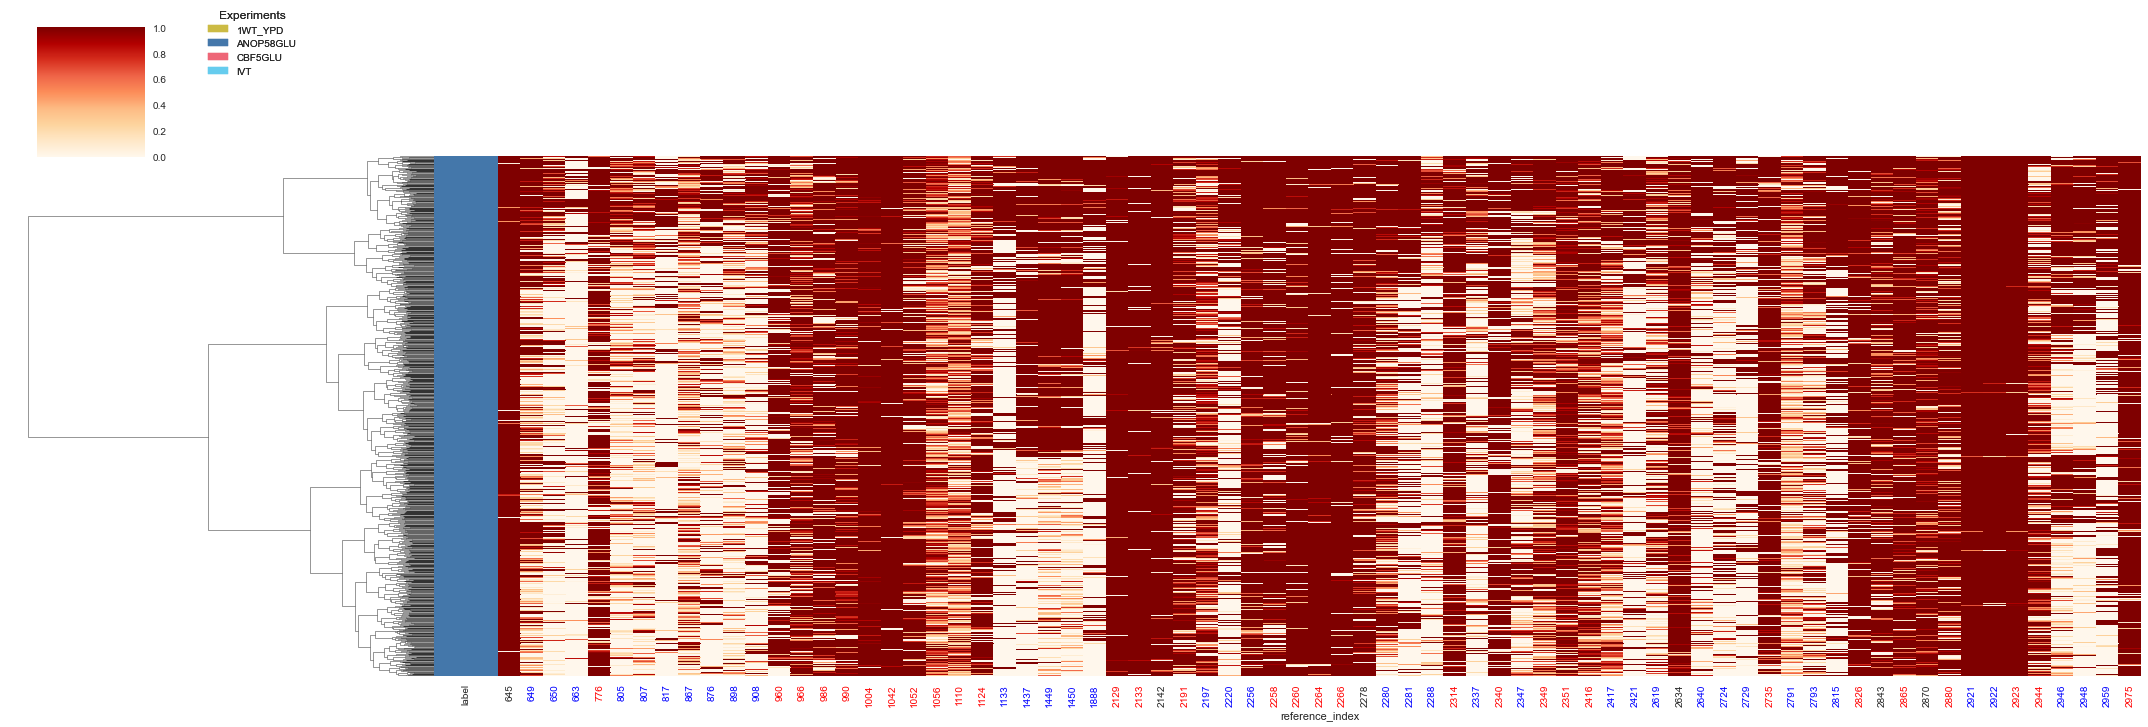

In [17]:
label = None
contig = 'RDN18-1'
contigs = ['RDN25-1']
Path("figures/depletion_plots").mkdir(parents=True, exist_ok=True)

labels = ["CBF5GLU", "ANOP58GLU"]
for label in labels:
    for contig in contigs:
        save_fig_path = None
        g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                       metric=metric,
                                       method=method, 
                                       label=label,
                                       col_cluster=False,
                                       row_cluster=True,
                                       twoprimeo_pos=None,
                                       pseduo_u_pos=None,
                                       legend=legend,
                                       figsize=figsize, 
                                       cmap=cmap)


520
CBF5GLU 1:377 n unmod:  5 n mod:  305
CBF5GLU 2:113 n unmod:  70 n mod:  3
CBF5GLU 3:30 n unmod:  0 n mod:  28


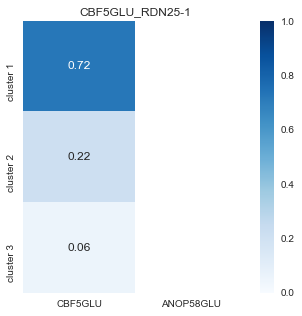

934
ANOP58GLU 1:393 n unmod:  275 n mod:  8
ANOP58GLU 2:305 n unmod:  4 n mod:  264
ANOP58GLU 3:236 n unmod:  12 n mod:  184


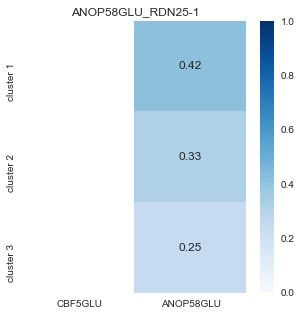

In [36]:
def get_count(count, label):
    if hasattr(count, label):
        return getattr(count, label)
    else:
        return 0

n = 10000
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"
cmap = "YlOrBr"
cmap = "OrRd"
n_clusters = 3
contigs = ["RDN25-1", "RDN18-1"]
labels = ["CBF5GLU", "ANOP58GLU"]
for label in labels:
    for contig in ["RDN25-1"]:
        X = vc.get_X(contig, vc.get_contig_positions(contig), n=n, label=label)
        Z = linkage(X, method=method, metric=metric)
        cut = cut_tree(Z, n_clusters=n_clusters)
        clusters = np.array([x[0]+1 for x in cut])
        plot_me = []
        print(len(X))
        for i in range(1, n_clusters+1):
            cluster_counts = []
            data = X[clusters == i]
            print(label, f"{i}:{len(data)}",  "n unmod: ", ((data[[1436, 1448, 1449]] >= 0.5).sum(axis=1) == 0).sum(), "n mod: ", ((data[[1436, 1448, 1449]] >= 0.5).sum(axis=1) == 3).sum())

            counts = data.index.get_level_values(1).value_counts()
            for label1 in labels:
                cluster_counts.append(get_count(counts, label1))
            plot_me.append(cluster_counts)
        data = pd.DataFrame(plot_me, columns=labels, index=[f"cluster {i}" for i in range(1, n_clusters+1)])
        # plot
        f, ax = plt.subplots(figsize=(5, 5))
        figure_path = None
    #     figure_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/percent_depletion/{contig}_depletion_fraction.svg"
#         figure_path = f"figures/depletion_plots/{contig}_depletion_fraction.svg"
        figure_path = None
        percents = (data / data.sum())
        ax = sns.heatmap(percents, cmap="Blues", annot=True, fmt=".2f", vmin=0, vmax=1)
        ax.set_title(f"{label}_{contig}")
        if figure_path is not None:
    #         assert not os.path.exists(figure_path), "Save fig path does exist: {}".format(figure_path)
            plt.savefig(figure_path, dpi=1000)
        else:
            plt.show()

In [29]:
data = X[clusters == i]
((data[[1436, 1448, 1449]] >= 0.5).sum(axis=1) == 0).sum() / len(data)


0.05084745762711865

In [22]:
pos = [1436, 1448, 1449]
data = vc.get_X("RDN25-1", [1436, 1448, 1449], label="CBF5GLU")
((data >= 0.5).sum(axis=1) == 0).sum() / len(data)


0.13871374527112232

In [23]:
pos = [1436, 1448, 1449]
data = vc.get_X("RDN25-1", [1436, 1448, 1449], label="ANOP58GLU")
((data >= 0.5).sum(axis=1) == 0).sum() / len(data)


0.3075020610057708

# Get read-ids in each cluster

In [11]:
# Depletion plotting
all_file_paths = [CBF5GLU, NOP58GLU, IVT, WT_YPD] 
all_labels = ["CBF5GLU", "ANOP58GLU", "IVT", "1WT_YPD"] 
# color_map = "Set1"
# color_map = "colorblind"
color_map = ['#4477AA', '#EE6677', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']
# color_map = blue, red, yellow, cyan, purple, grey

color_map = ['#CCBB44','#4477AA', '#EE6677', '#66CCEE', '#AA3377', '#BBBBBB']
vc = VariantCalls(all_file_paths, all_labels, color_map=color_map)


In [12]:
contig = "RDN25-1"
X = vc.get_X(contig, vc.get_contig_positions(contig), n=n)
Z = linkage(X, method=method, metric=metric)
cut = cut_tree(Z, n_clusters=4)
clusters = np.array([x[0]+1 for x in cut])


In [20]:
print("cluster 1\n", X[clusters == 1].index.get_level_values(1).value_counts())
print("cluster 2\n", X[clusters == 2].index.get_level_values(1).value_counts())
print("cluster 3\n", X[clusters == 3].index.get_level_values(1).value_counts())
print("cluster 4\n", X[clusters == 4].index.get_level_values(1).value_counts())


cluster 1
 1WT_YPD      996
ANOP58GLU    222
CBF5GLU       37
Name: label, dtype: int64
cluster 2
 CBF5GLU    482
1WT_YPD      2
Name: label, dtype: int64
cluster 3
 ANOP58GLU    712
1WT_YPD        2
CBF5GLU        1
Name: label, dtype: int64
cluster 4
 IVT    631
Name: label, dtype: int64


In [33]:
cbf5_ids = pd.DataFrame(X[clusters == 2].xs("CBF5GLU", level="label").index.get_level_values(0))
nop58_ids = pd.DataFrame(X[clusters == 3].xs("ANOP58GLU", level="label").index.get_level_values(0))

In [35]:
save_fig_path = f"figures/depletion_plots/CBF5GLU_cluster_ids.csv"
cbf5_ids.to_csv(save_fig_path, index=False, header=False)

save_fig_path = f"figures/depletion_plots/NOP58GLU_cluster_ids.csv"
nop58_ids.to_csv(save_fig_path, index=False, header=False)
